In [4]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science','grid','no-latex'])

In [5]:
def T(f_obs,v):
    h=6.62607015e-34
    c=2.99792458e8
    k=1.380649e-23

    return h*v/(k*np.log(1+((2*h*v**3)/(f_obs*c**2))))
    
def B_lambda(l,T):

    h=6.62607015e-34
    c=2.99792458e8
    k=1.380649e-23
    con1=2*np.pi*h*c**2
    con2=h*c/k
    return  con1/((l**5)*(np.exp(con2/l*T)-1))



$$B_\lambda=\frac{v}{c^2}B_v$$

In [6]:
c=2.99792458e8


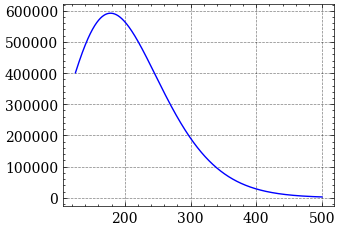

In [7]:
x=np.linspace(125,500,num=5000)
plt.plot(x,c*x**2*B_lambda(1/x,2.725),'b-')
plt.show()

In [8]:
data=np.loadtxt('data.txt',delimiter=',',unpack=True)
v = data[0]
f_obs = data[1]
f_res=data[2]
sig=data[3]
f_gal=data[4]

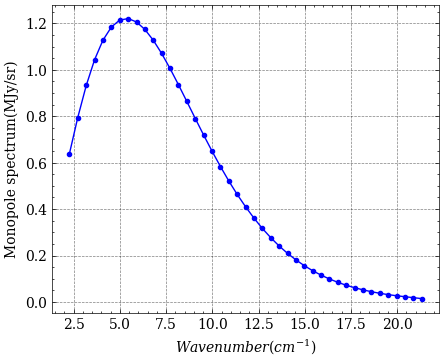

In [9]:
y_err=sig*1e-3
plt.figure(figsize=(5,4))
#plt.errorbar(v,f_obs,y_err,ls='',color='k')
plt.plot(v,f_obs*1e-2/np.pi,'b.-')
plt.xlabel('$Wavenumber(cm^{-1})$')
plt.ylabel('Monopole spectrum(MJy/sr)')
#plt.plot(3e8/v,-v**2*f_th(v , 2.725),'r.-')
plt.show()

In [10]:
f=v*2.99792458

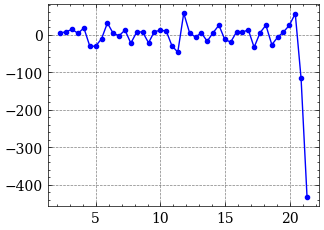

In [11]:
plt.plot(v,f_res,'b.-')
plt.show()

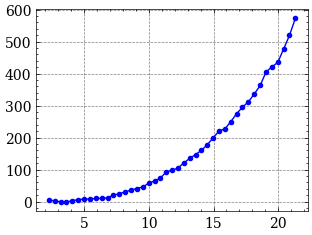

In [12]:
plt.plot(v,f_gal,'b.-')
plt.show()


In [16]:
from scipy.constants import h,c,k
c=100*c
from scipy.optimize import curve_fit
vn,f=np.loadtxt('weirdata.txt',delimiter=',',unpack=True)
def B(v,T):
    return 2*h*v**3*c**2/(np.exp(h*c*v/k/T)-1)*1e7
sigma=[]
for i in v:
    sigma.append(2e-6)
T0=1
popt,pcov=curve_fit(B,vn,f,p0=[T0])

Tfit=popt[0]
Bfit=B(vn,Tfit)

popt # T cmbr

array([2.71467947])

In [17]:
np.sqrt(pcov) #error

array([[0.00405353]])

In [18]:
v,f0,fres,sig,fgal=np.loadtxt('data.txt',delimiter=',',unpack=True)

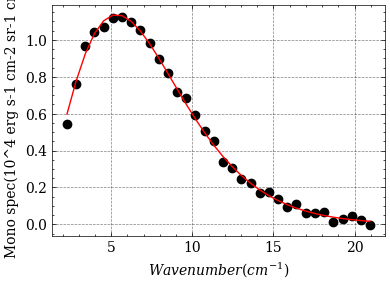

In [23]:
plt.figure(figsize=(4.3,3))
#plt.errorbar(v,f_obs,y_err,ls='',color='k')
#plt.plot(v,f0*1e4,'b--')
plt.plot(vn,f*1e4,'ko')
plt.plot(vn,Bfit*1e4,'r-')
plt.xlabel('$Wavenumber(cm^{-1})$')
plt.ylabel('Mono spec(10^4 erg s-1 cm-2 sr-1 cm)')
#plt.plot(3e8/v,-v**2*f_th(v , 2.725),'r.-')
plt.show()